In [80]:
!pip install joblib

In [2]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOADING DATA

In [3]:
df = pd.read_csv("airline_passenger_satisfaction.csv")
pd.set_option('display.max_columns', None)
df.tail()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
129875,129876,Male,28,Returning,Personal,Economy Plus,447,2,3.0,4,4,4,4,2,5,1,4,4,4,5,4,4,4,Neutral or Dissatisfied
129876,129877,Male,41,Returning,Personal,Economy Plus,308,0,0.0,5,3,5,3,4,5,2,5,2,2,4,3,2,5,Neutral or Dissatisfied
129877,129878,Male,42,Returning,Personal,Economy Plus,337,6,14.0,5,2,4,2,1,3,3,4,3,3,4,2,3,5,Neutral or Dissatisfied
129878,129879,Male,50,Returning,Personal,Economy Plus,337,31,22.0,4,4,3,4,1,4,4,5,3,3,4,5,3,5,Satisfied
129879,129880,Female,20,Returning,Personal,Economy Plus,337,0,0.0,1,3,4,3,2,4,2,4,2,2,2,3,2,1,Neutral or Dissatisfied


In [4]:
# deleted id column
df.drop(columns='ID', inplace=True)

In [5]:
df.shape

(129880, 23)

In [6]:
df.describe().round(2)

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.00,129880.00,129880.00,129487.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00,129880.00
mean,39.43,1190.32,14.71,15.09,3.06,2.76,3.31,3.25,2.98,3.38,3.44,3.35,3.29,3.20,3.64,2.73,3.36,3.63
std,15.12,997.45,38.07,38.47,1.53,1.40,1.27,1.35,1.28,1.29,1.32,1.32,1.31,1.33,1.18,1.33,1.33,1.18
min,7.00,31.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,27.00,414.00,0.00,0.00,2.00,2.00,3.00,2.00,2.00,2.00,2.00,2.00,2.00,2.00,3.00,2.00,2.00,3.00
50%,40.00,844.00,0.00,0.00,3.00,3.00,3.00,3.00,3.00,4.00,4.00,4.00,3.00,3.00,4.00,3.00,4.00,4.00
75%,51.00,1744.00,12.00,13.00,4.00,4.00,4.00,4.00,4.00,4.00,5.00,4.00,4.00,4.00,5.00,4.00,4.00,5.00
max,85.00,4983.00,1592.00,1584.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00


In [7]:
df.dtypes

Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


## CLEANING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129487 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

In [9]:
df.isnull().sum()

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [10]:
df['Arrival Delay']

0          5.0
1         39.0
2          0.0
3          0.0
4          1.0
          ... 
129875     3.0
129876     0.0
129877    14.0
129878    22.0
129879     0.0
Name: Arrival Delay, Length: 129880, dtype: float64

In [11]:
df['Arrival Delay'].fillna(df['Arrival Delay'].mean().round(2), inplace=True)

In [12]:
df.isnull().sum()

Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                          0
Satisfaction                    

In [13]:
df['Arrival Delay'].mean()

np.float64(15.091125423467817)

## CHARTS 

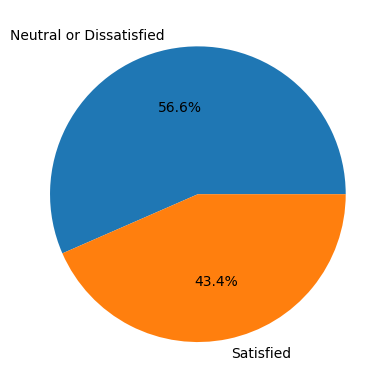

In [14]:
plt.pie(df['Satisfaction'].value_counts(), labels=["Neutral or Dissatisfied", 'Satisfied'], autopct='%1.1f%%')
plt.show()

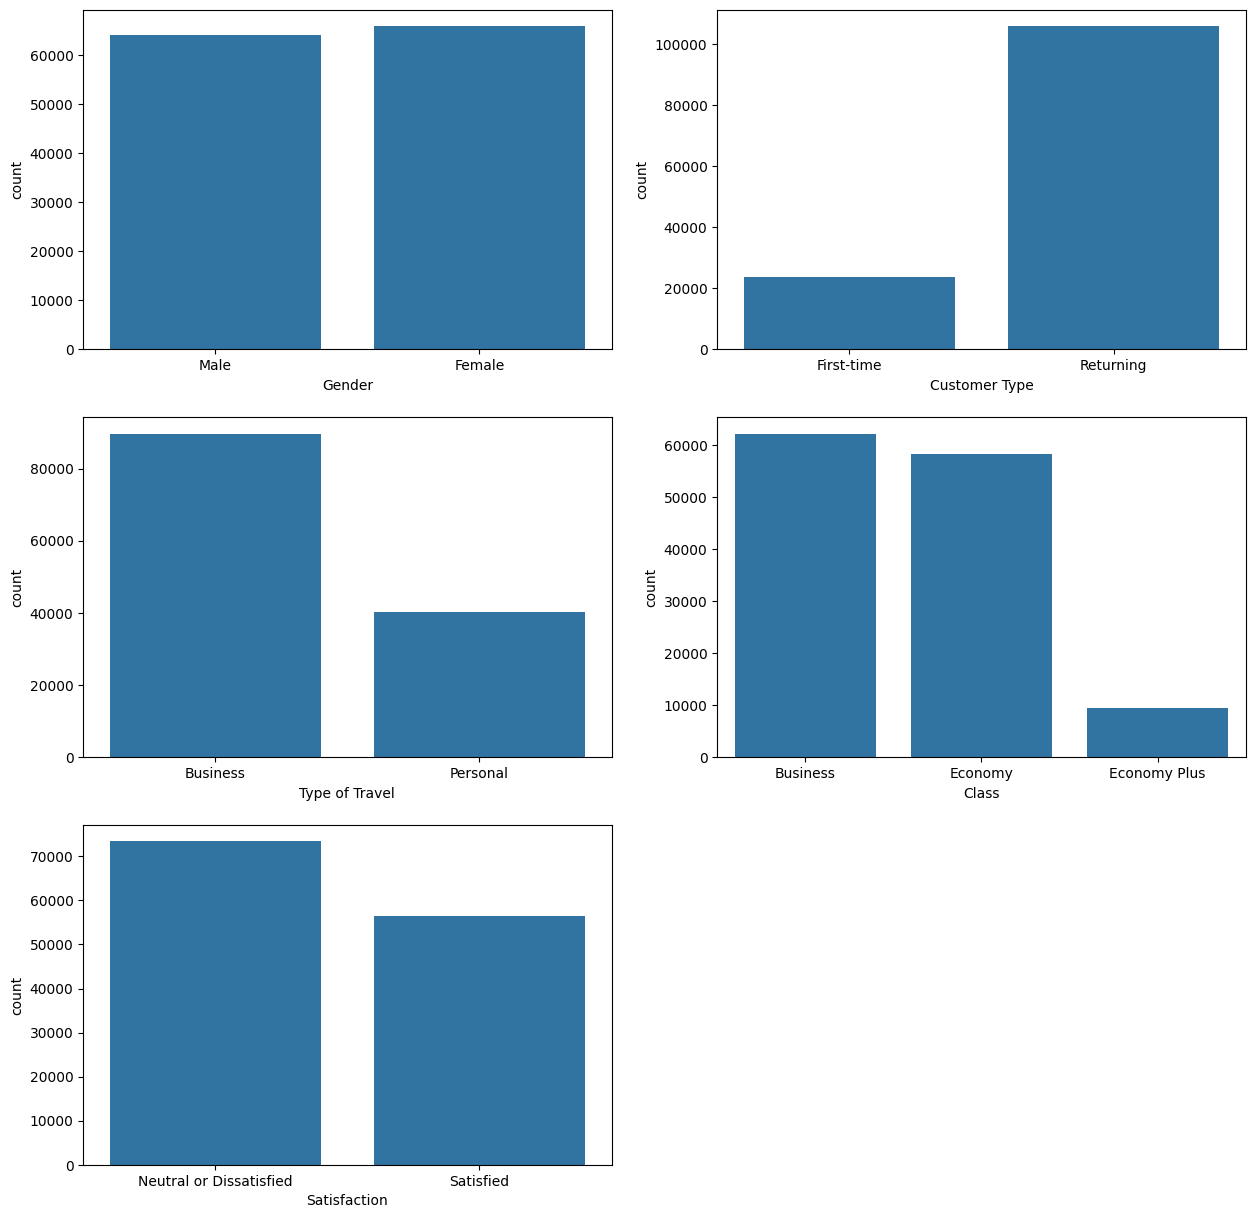

In [15]:
cols = ['Gender', "Customer Type", "Type of Travel", 'Class', 'Satisfaction']
plt.figure(figsize=(15, 15))
for i, col in enumerate(cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=col, data=df)
plt.show()

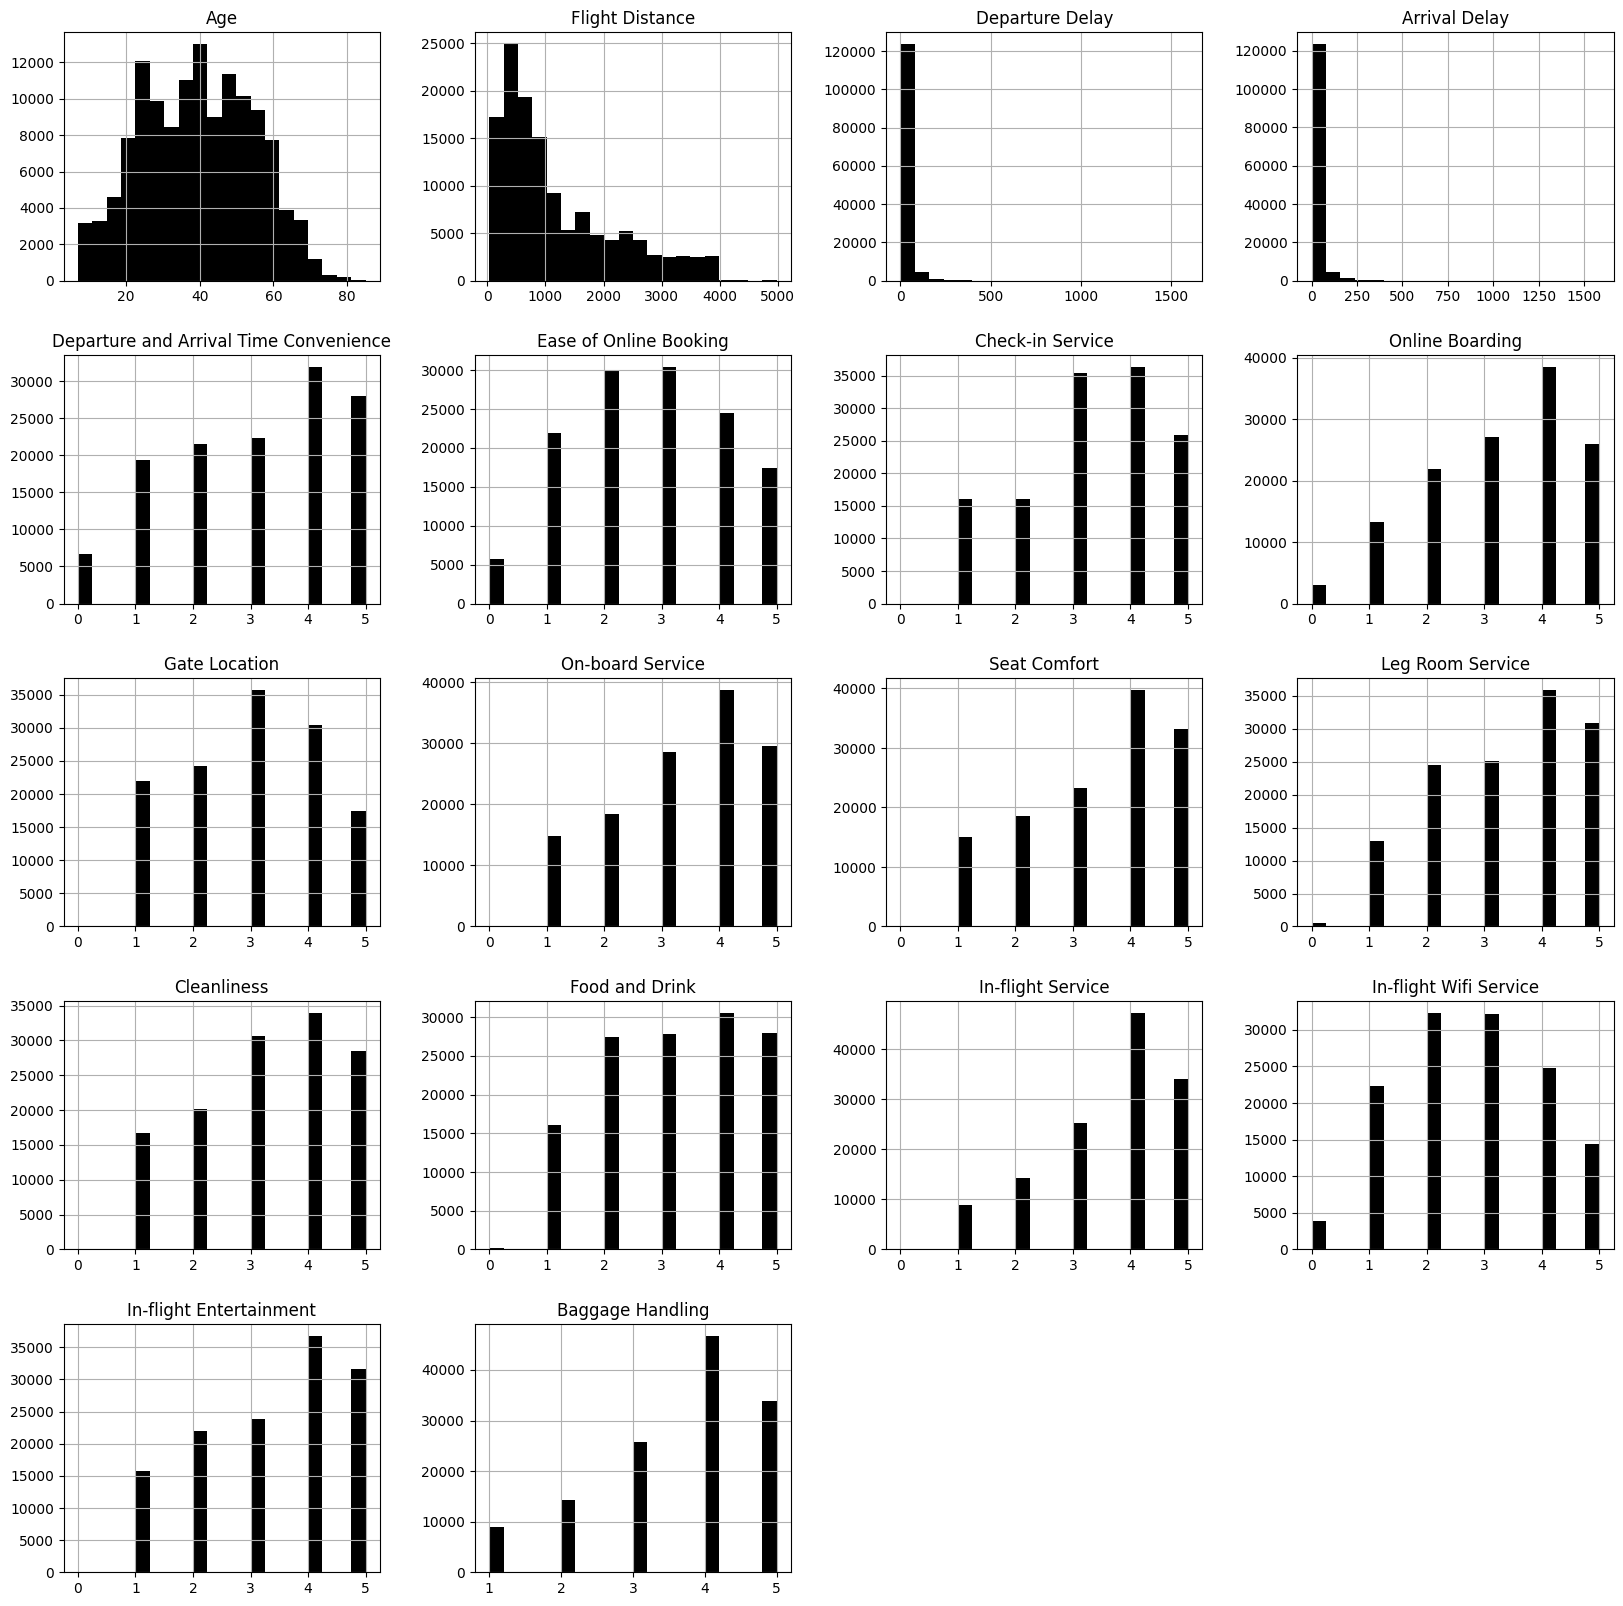

In [16]:
df.hist(bins=20, figsize=(20, 20), color='black')
plt.show()

## ENCODING

In [17]:
df.select_dtypes(include='object').columns

Index(['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Satisfaction'], dtype='object')

In [18]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [19]:
df['Customer Type'].unique()

array(['First-time', 'Returning'], dtype=object)

In [20]:
df['Type of Travel'].unique()

array(['Business', 'Personal'], dtype=object)

In [21]:
df['Class'].unique()

array(['Business', 'Economy', 'Economy Plus'], dtype=object)

In [22]:
df['Satisfaction'].unique()

array(['Neutral or Dissatisfied', 'Satisfied'], dtype=object)

In [23]:
# option 1
label_encoder = LabelEncoder()
columns = df.select_dtypes(include='object').drop(columns='Satisfaction').columns

for column in columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5,Satisfied
2,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3,Satisfied
3,1,50,1,0,0,1905,0,0.0,2,2,3,4,2,5,5,5,4,4,5,2,5,5,Satisfied
4,0,49,1,0,0,3470,0,1.0,3,3,3,5,3,3,4,4,5,4,3,3,3,3,Satisfied


In [24]:
# Nuh uh (option 2)
# df.replace({
#     'Gender': {
#         'Male': 1,
#         'Female': 2
#     },
#     'Customer Type': {
#         'First-time': 1,
#         'Returning': 2
#     },
#     'Type of Travel': {
#         'Business': 1,
#         'Personal': 2
#     },
#     'Class': {
#         'Business': 1,
#         'Economy': 2,
#         'Economy Plus': 3
#     }
# })

In [25]:
df.dtypes

Gender                                      int64
Age                                         int64
Customer Type                               int64
Type of Travel                              int64
Class                                       int64
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64
In-flight Wifi Service                      int64


## ADDITIONAL CHARTS

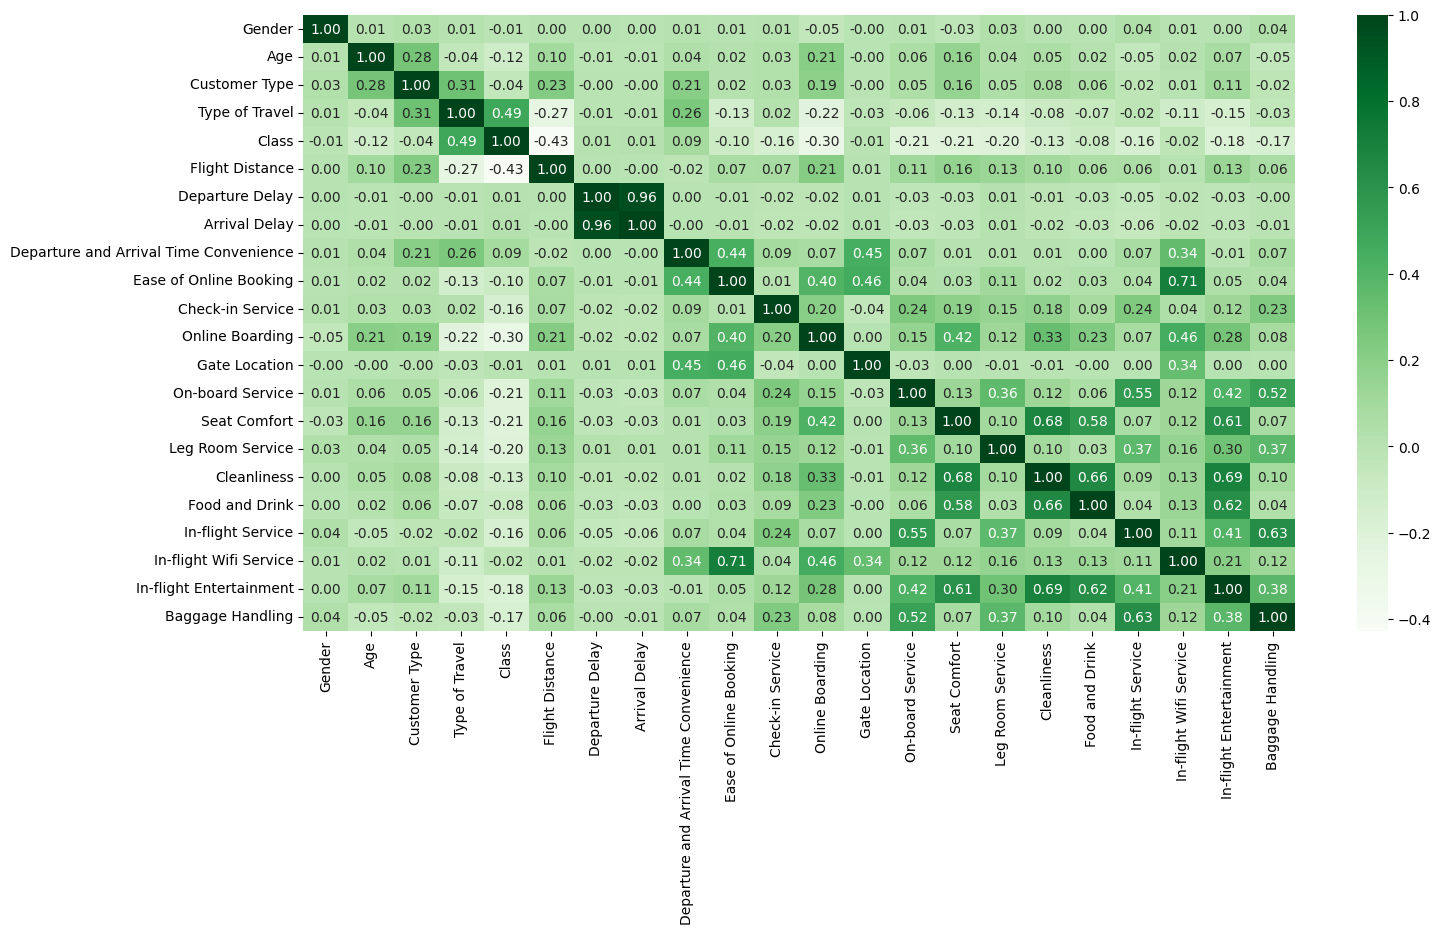

In [26]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.drop(columns='Satisfaction').corr(), annot=True, fmt='.2f', cmap='Greens')
plt.show()

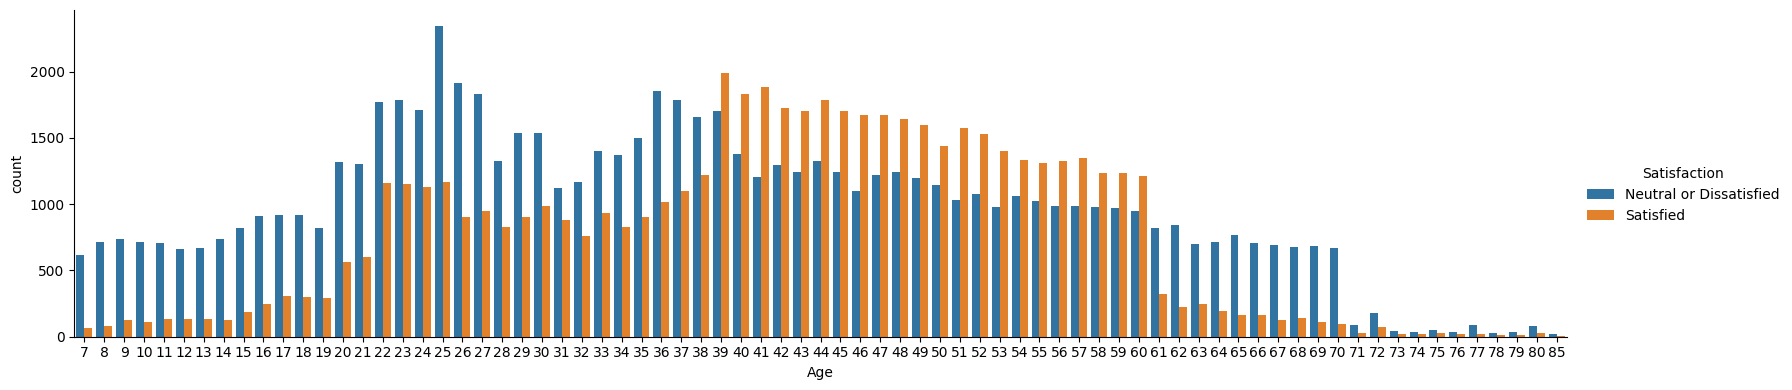

In [27]:
sns.catplot(data=df, x='Age', height=4, aspect=4, kind='count', hue='Satisfaction')
plt.show()

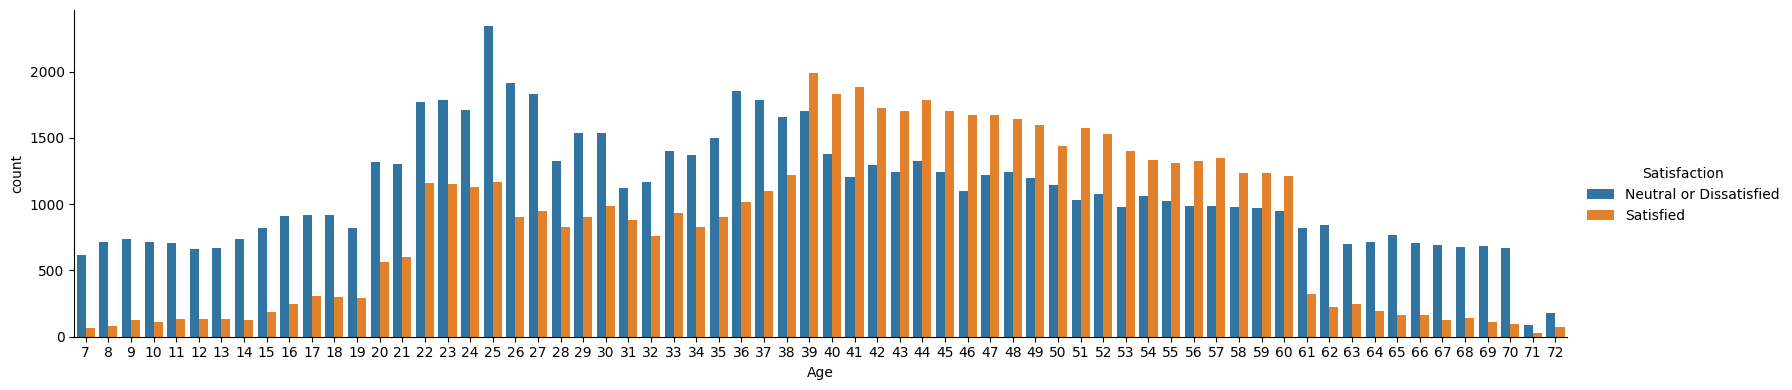

In [28]:
sns.catplot(data=df, x='Age', height=4, aspect=4, kind='count', hue='Satisfaction', order=range(7, 73))
plt.show()

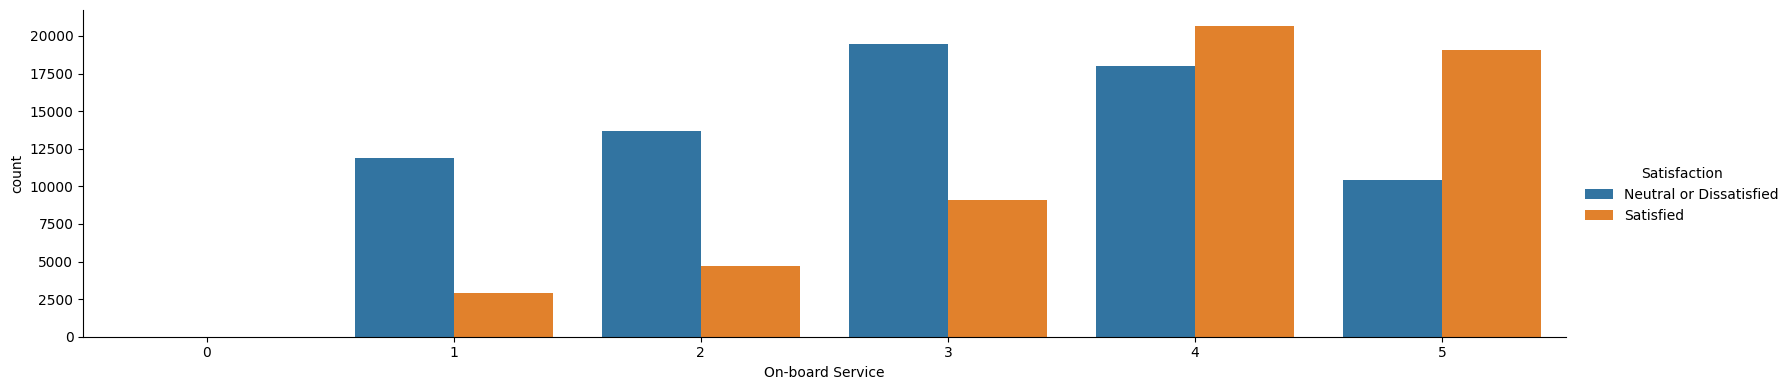

In [29]:
sns.catplot(data=df, x='On-board Service', height=4, aspect=4, kind='count', hue='Satisfaction')
plt.show()

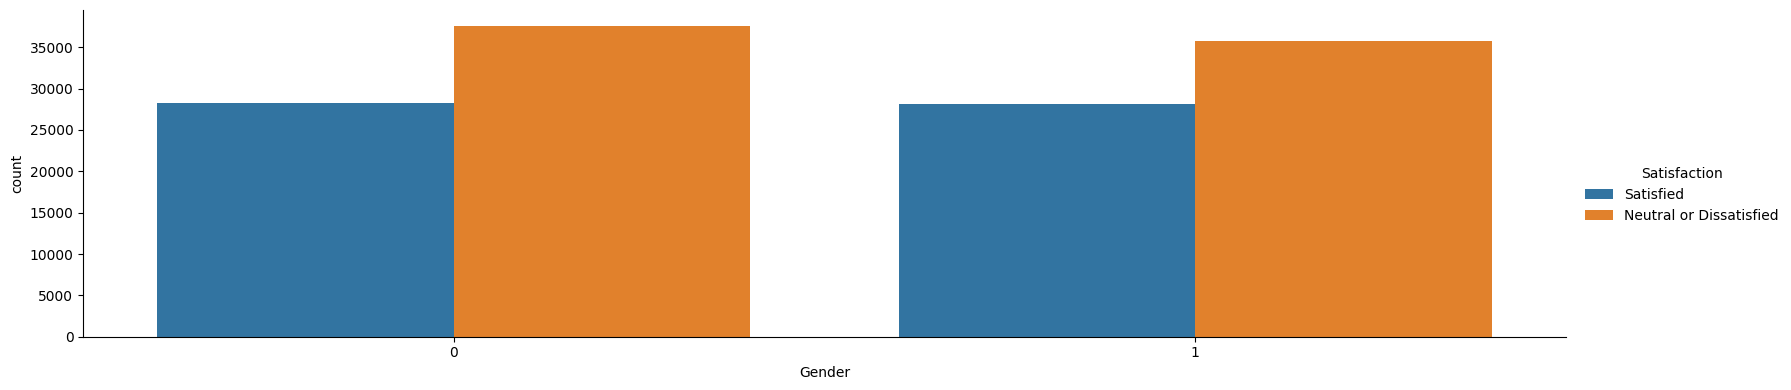

In [30]:
sns.catplot(data=df, x='Gender', height=4, aspect=4, kind='count', hue='Satisfaction')
plt.show()

## FILTERING 

In [31]:
df[['Gender', 'Age', 'Type of Travel']].head()

,Gender,Age,Type of Travel
0,1,48,0
1,0,35,0
2,1,41,0
3,1,50,0
4,0,49,0


In [32]:
df.loc[100000:100002, ['Age', 'Class', 'Flight Distance', 'Check-in Service']]

,Age,Class,Flight Distance,Check-in Service
100000,37,0,220,5
100001,22,0,3871,3
100002,56,0,3386,4


In [33]:
df.loc[df['Age'] > 50, ['Age', 'Class', 'Flight Distance', 'Check-in Service']].head(10)

,Age,Class,Flight Distance,Check-in Service
7,60,0,853,3
14,52,1,853,3
15,70,1,821,4
17,61,1,821,5
21,70,1,853,4
22,56,1,821,4
23,77,2,821,1
24,51,0,3460,5
27,58,0,2867,4
36,54,0,212,5


In [34]:
df.loc[df['Gender'] == 1, ['Gender', 'Class', 'Flight Distance', 'Check-in Service']].head()

,Gender,Class,Flight Distance,Check-in Service
0,1,0,821,4
2,1,0,853,4
3,1,0,1905,3
5,1,0,3788,3
6,1,0,1963,4


In [35]:
df.iloc[10:15, 0:7].head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay
10,0,28,0,0,0,821,0
11,0,27,0,0,0,421,20
12,1,24,0,0,1,453,16
13,1,9,1,1,0,853,68
14,1,52,1,1,1,853,0


In [36]:
df.columns

Index(['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class',
       'Flight Distance', 'Departure Delay', 'Arrival Delay',
       'Departure and Arrival Time Convenience', 'Ease of Online Booking',
       'Check-in Service', 'Online Boarding', 'Gate Location',
       'On-board Service', 'Seat Comfort', 'Leg Room Service', 'Cleanliness',
       'Food and Drink', 'In-flight Service', 'In-flight Wifi Service',
       'In-flight Entertainment', 'Baggage Handling', 'Satisfaction'],
      dtype='object')

In [37]:
df.index

RangeIndex(start=0, stop=129880, step=1)

## MODELS

In [38]:
X = df.drop(columns='Satisfaction')
y = df['Satisfaction']

In [39]:
X.head(3)

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,1,48,0,0,0,821,2,5.0,3,3,4,3,3,3,5,2,5,5,5,3,5,5
1,0,35,1,0,0,821,26,39.0,2,2,3,5,2,5,4,5,5,3,5,2,5,5
2,1,41,1,0,0,853,0,0.0,4,4,4,5,4,3,5,3,5,5,3,4,3,3


In [40]:
y.head(3)

0    Neutral or Dissatisfied
1                  Satisfied
2                  Satisfied
Name: Satisfaction, dtype: object

### DECISION TREE

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [42]:
model = DecisionTreeClassifier()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X.shape

(129880, 22)

In [44]:
X_train.shape

(103904, 22)

In [45]:
X_test.shape

(25976, 22)

In [46]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [47]:
predictions = model.predict(X_test)
predictions

array(['Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied',
       ..., 'Neutral or Dissatisfied', 'Neutral or Dissatisfied',
       'Neutral or Dissatisfied'], shape=(25976,), dtype=object)

In [48]:
model_score = accuracy_score(y_test, predictions)
model_score

0.9477979673544811

### RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
predictions = model.predict(X_test)
predictions

array(['Neutral or Dissatisfied', 'Satisfied', 'Satisfied', ...,
       'Satisfied', 'Neutral or Dissatisfied', 'Satisfied'],
      shape=(25976,), dtype=object)

In [52]:
model_score = accuracy_score(y_test, predictions)
model_score

0.9623113643363105

### KNEIGHBORSCLASSIFIER

In [53]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
predictions = model.predict(X_test)
predictions

array(['Neutral or Dissatisfied', 'Satisfied', 'Neutral or Dissatisfied',
       ..., 'Neutral or Dissatisfied', 'Neutral or Dissatisfied',
       'Neutral or Dissatisfied'], shape=(25976,), dtype=object)

In [56]:
model_score = accuracy_score(y_test, predictions)
model_score

0.7504619648906683

### LOGISTIC REGRESSION

In [57]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [59]:
predictions = model.predict(X_test)
predictions

array(['Satisfied', 'Satisfied', 'Neutral or Dissatisfied', ...,
       'Neutral or Dissatisfied', 'Neutral or Dissatisfied', 'Satisfied'],
      shape=(25976,), dtype=object)

In [60]:
model_score = accuracy_score(y_test, predictions)
model_score

0.8739220819217739

## PREDICTION WITHOUT VOTING COLUMNS


In [62]:
X = df[['Gender', 'Age', 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Departure Delay', 'Arrival Delay']]
X.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay
0,1,48,0,0,0,821,2,5.0
1,0,35,1,0,0,821,26,39.0
2,1,41,1,0,0,853,0,0.0
3,1,50,1,0,0,1905,0,0.0
4,0,49,1,0,0,3470,0,1.0


In [ ]:
y = df['Satisfaction']

In [63]:
model = RandomForestClassifier()

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model.fit(X_train, y_train)

RandomForestClassifier()

In [65]:
predictions = model.predict(X_test)
predictions

array(['Satisfied', 'Neutral or Dissatisfied', 'Neutral or Dissatisfied',
       ..., 'Neutral or Dissatisfied', 'Neutral or Dissatisfied',
       'Satisfied'], shape=(25976,), dtype=object)

In [66]:
model_score = accuracy_score(y_test, predictions)
model_score

0.7661302740991685

In [68]:
X.iloc[:0].to_dict()

{'Gender': {},
 'Age': {},
 'Customer Type': {},
 'Type of Travel': {},
 'Class': {},
 'Flight Distance': {},
 'Departure Delay': {},
 'Arrival Delay': {}}

In [78]:
test_inputs = {
     'Gender': [0, 1],
     'Age': [34, 43],
     'Customer Type': [1, 0],
     'Type of Travel': [0, 1],
     'Class': [0, 2],
     'Flight Distance': [2500, 3788],
     'Departure Delay': [0, 0],
     'Arrival Delay': [0, 0]
}

test_df = pd.DataFrame(test_inputs)
test_df

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay
0,0,34,1,0,0,2500,0,0
1,1,43,0,1,2,3788,0,0


In [79]:
model.predict(test_df)

array(['Satisfied', 'Neutral or Dissatisfied'], dtype=object)

## SAVING PREDICTION MODEL

In [81]:
import joblib
joblib.dump(model, 'airline_passanger_satisfaction.joblib')

['airline_passanger_satisfaction.joblib']

In [82]:
trained_model = joblib.load('airline_passanger_satisfaction.joblib')
trained_model.predict(test_df)

array(['Satisfied', 'Neutral or Dissatisfied'], dtype=object)